# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import pandas as pd
import numpy as np

import datetime
from dateutil.relativedelta import relativedelta

# Viz mantra
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go

# Statsmodel
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:

sensor.isna().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

In [5]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


How many rows and columns are in our data?

In [6]:
# Your code here:

print(f"rows: {sensor.shape[0]}, columns: {sensor.shape[1]}")

rows: 1751, columns: 12


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [7]:
# Your code here:

time = pd.date_range(start="1/1/2018 00:00:00", end="1/1/2018 00:29:10", periods=sensor.shape[0])
time = pd.DatetimeIndex(time, freq=pd.infer_freq(time))
time

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Assign the time series index to the dataframe's index.

In [8]:
# Your code here:

sensor = sensor.set_index(time)
sensor.head(3)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

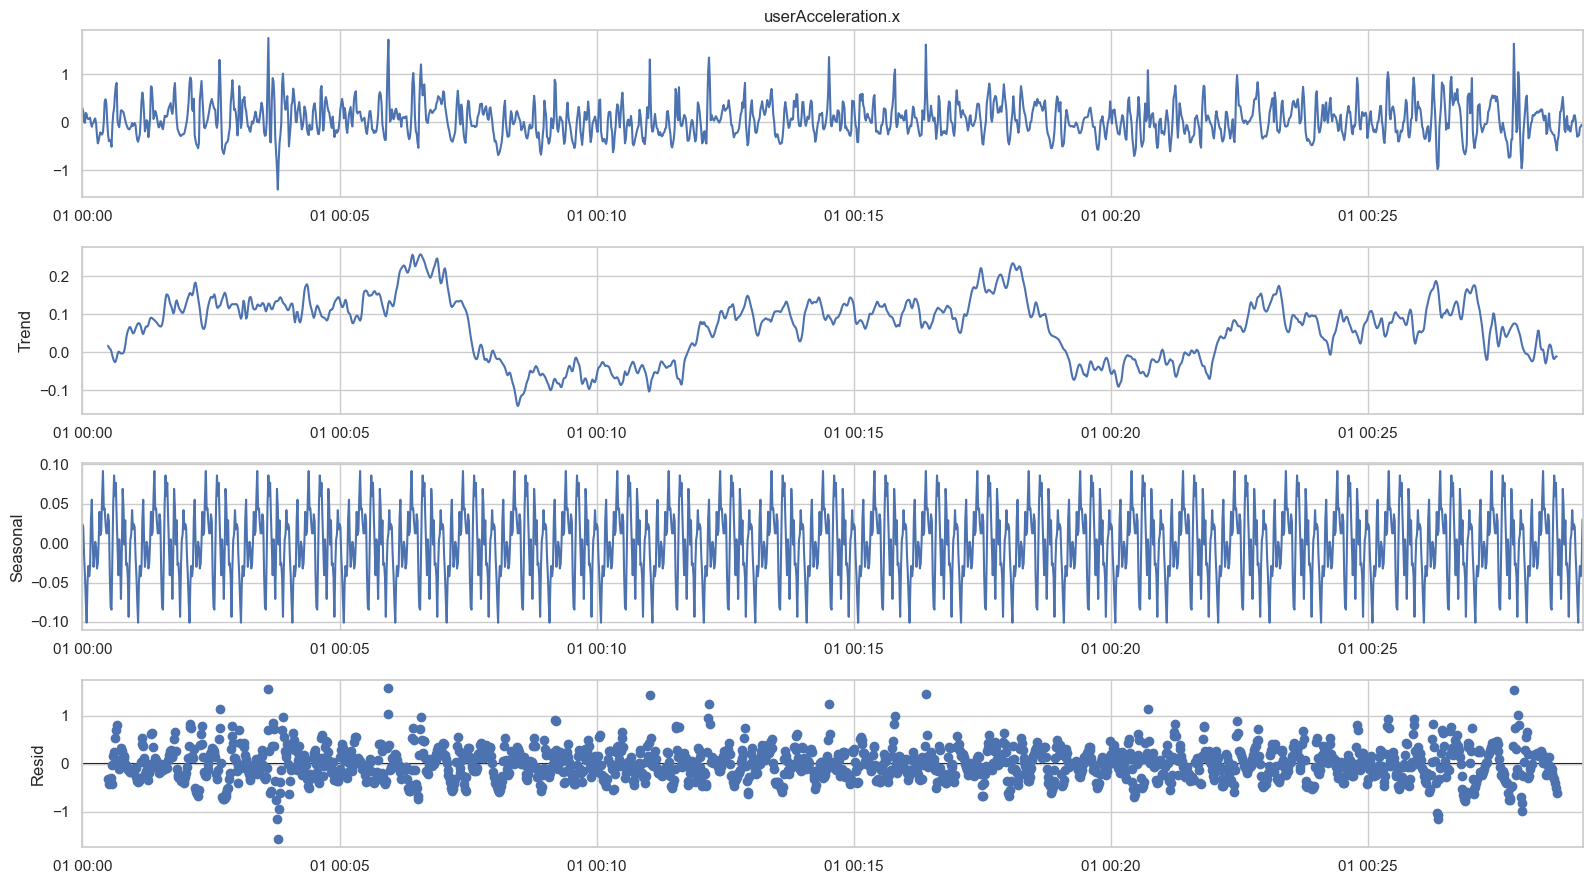

In [9]:
# Your code here:

decomp = seasonal_decompose(sensor['userAcceleration.x'], model = "additive", period=60)
decomp.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

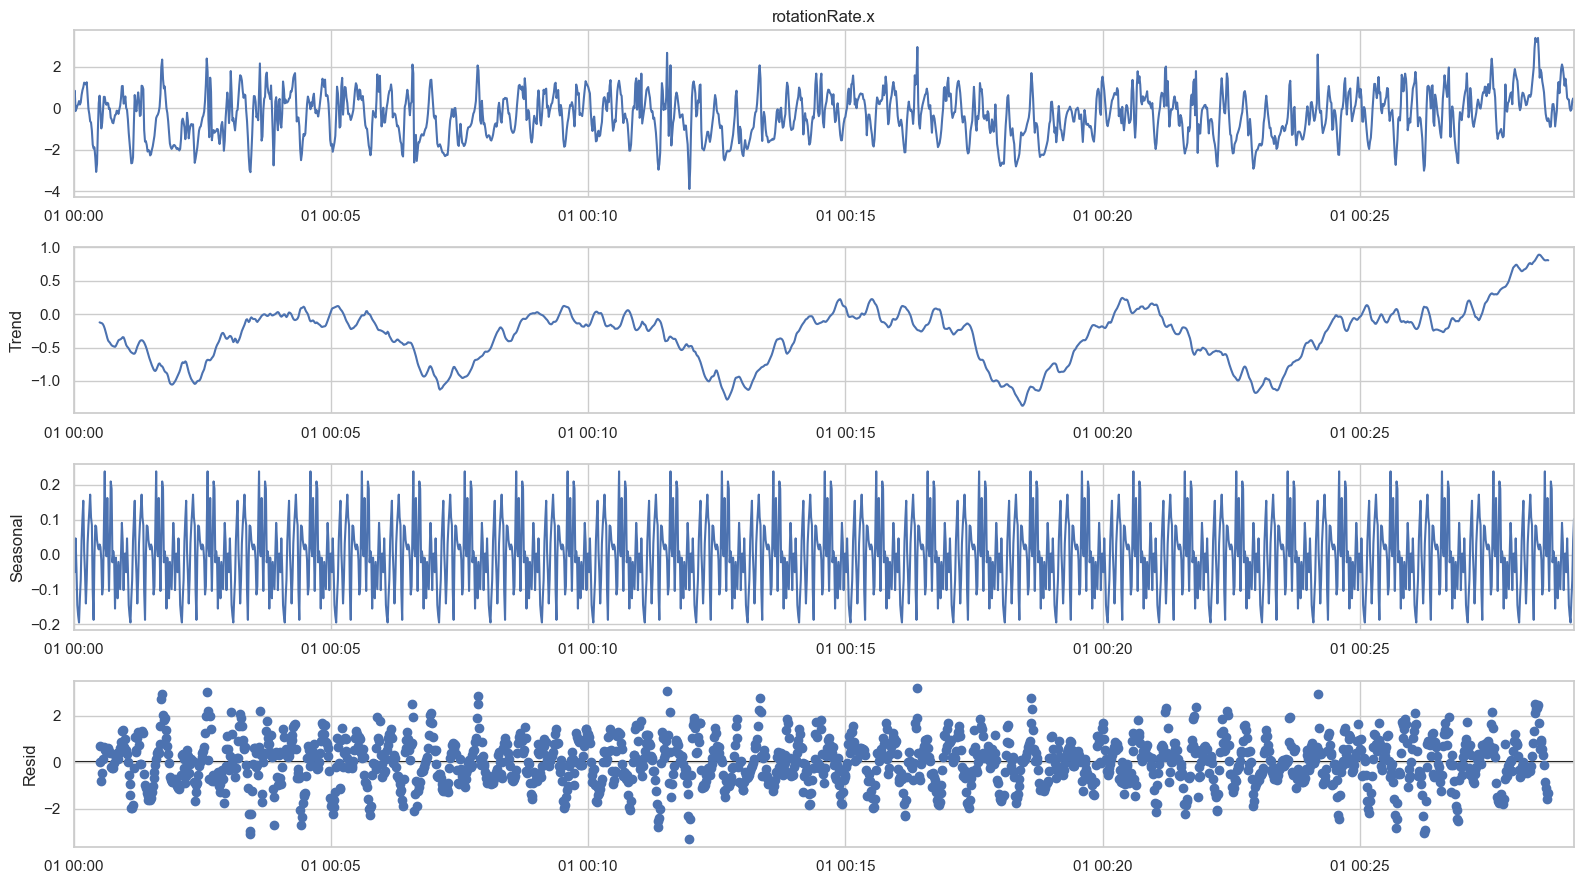

In [10]:
decomp_2 = seasonal_decompose(sensor['rotationRate.x'], model = "additive", period=60)
decomp_2.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


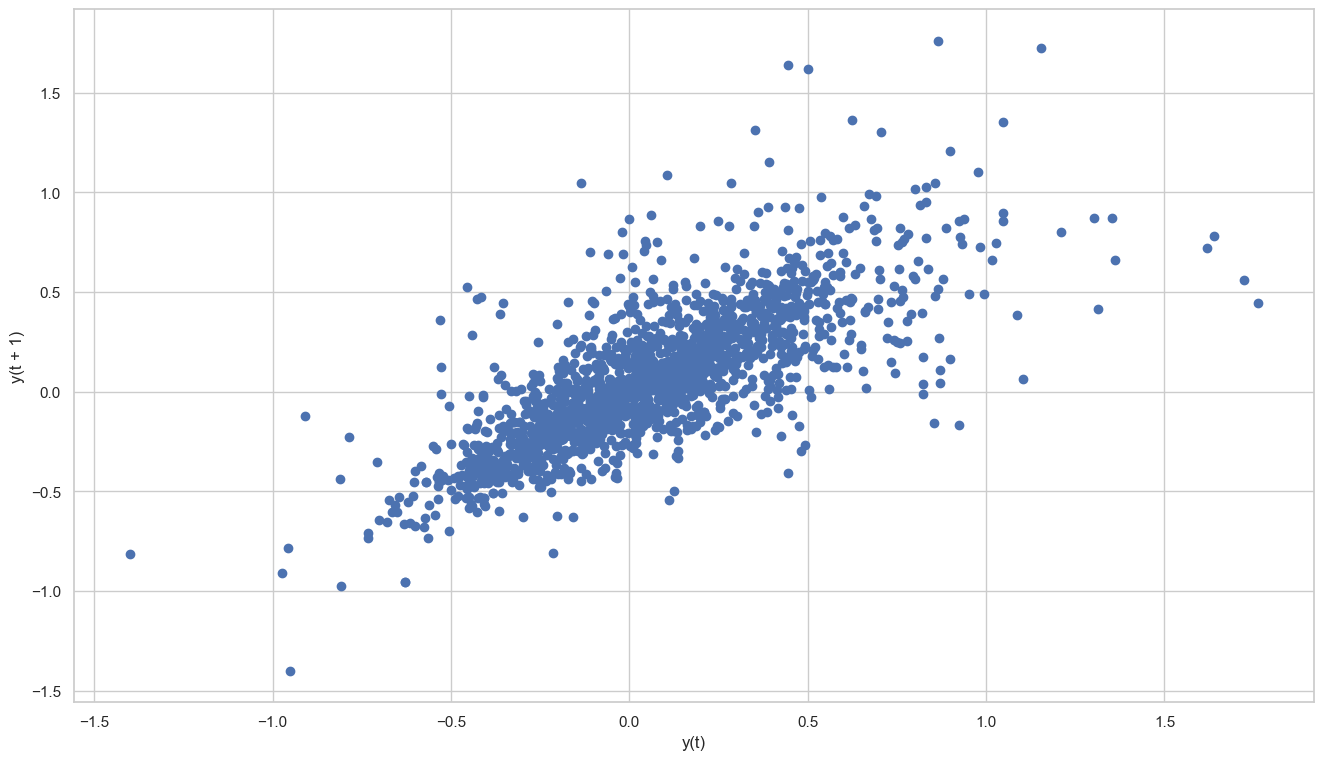

In [11]:
# Your code here:

pd.plotting.lag_plot(sensor['userAcceleration.x'], lag=1);

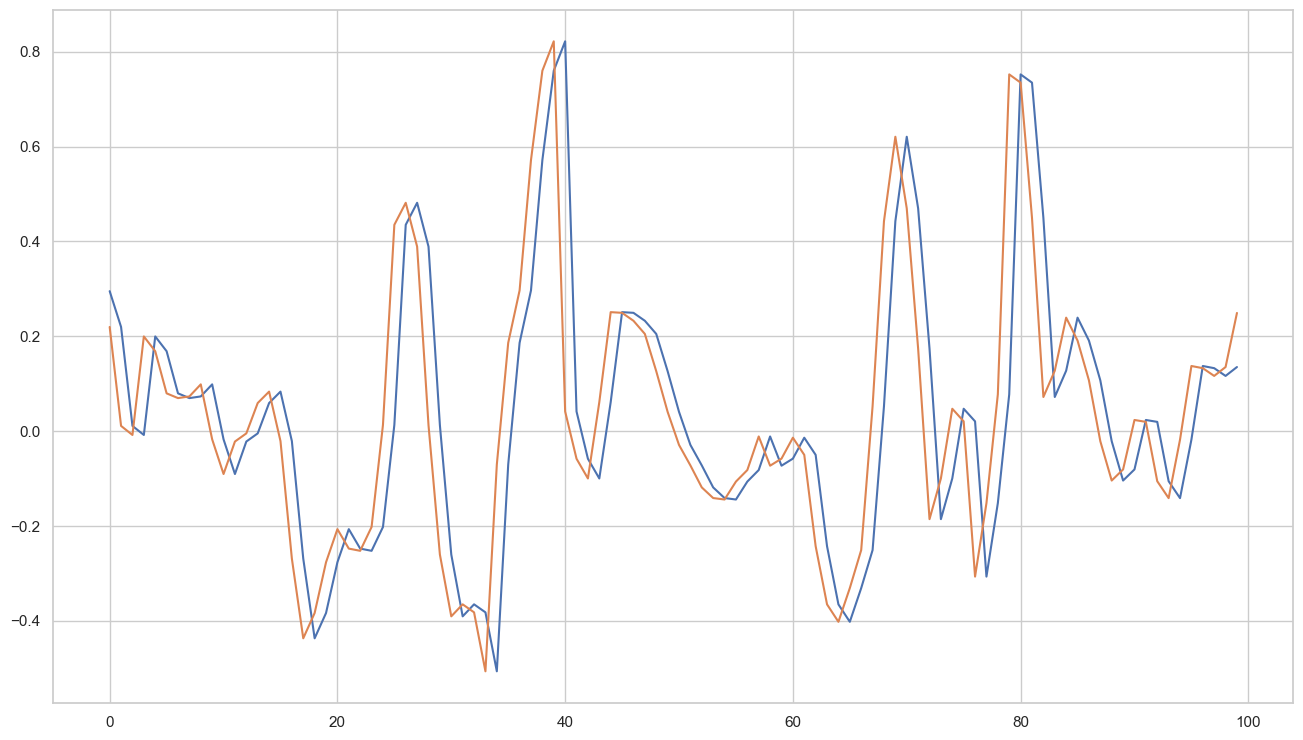

In [12]:
sensor_1 = sensor['userAcceleration.x']
sensor_1_plus = sensor['userAcceleration.x'][1:]
plt.plot(sensor_1.values[:100])
plt.plot(sensor_1_plus.values[:100]);

Create a lag plot for `rotationRate.x`

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


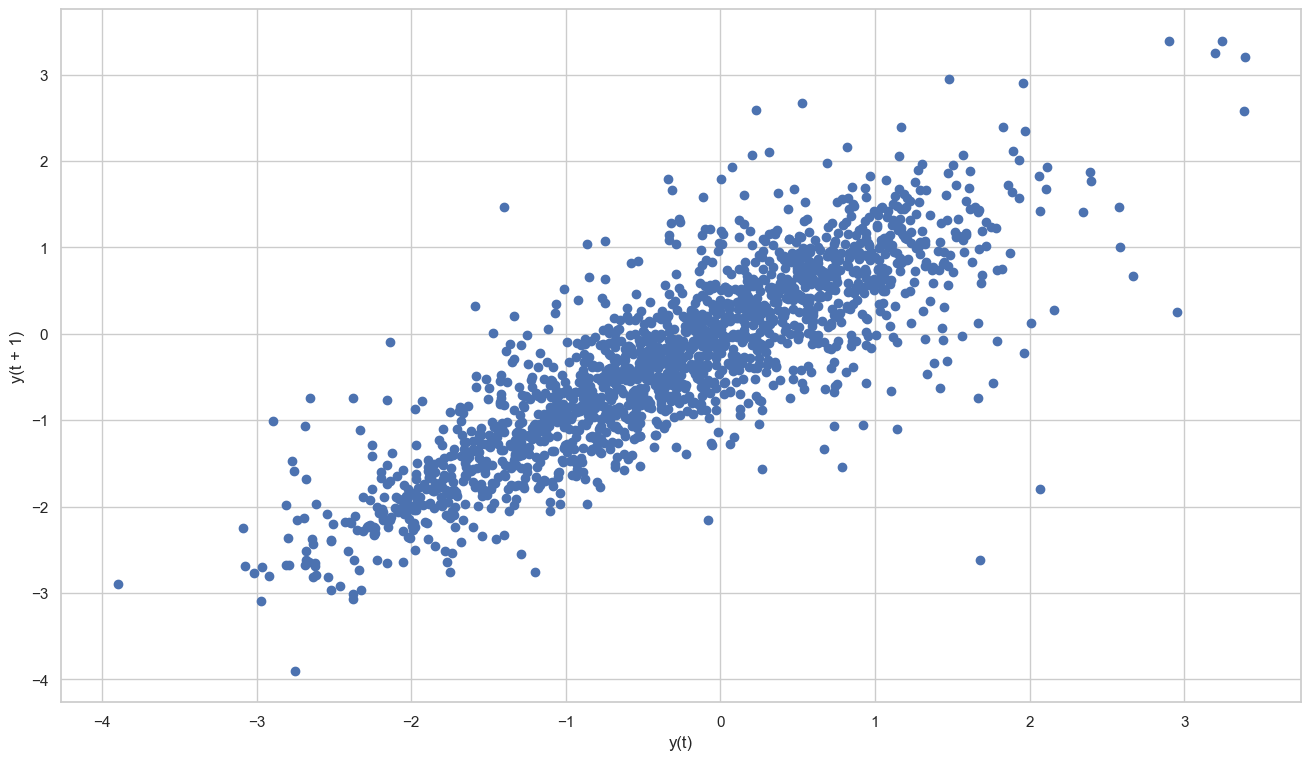

In [13]:
# Your code here:

pd.plotting.lag_plot(sensor['rotationRate.x'], lag=1);

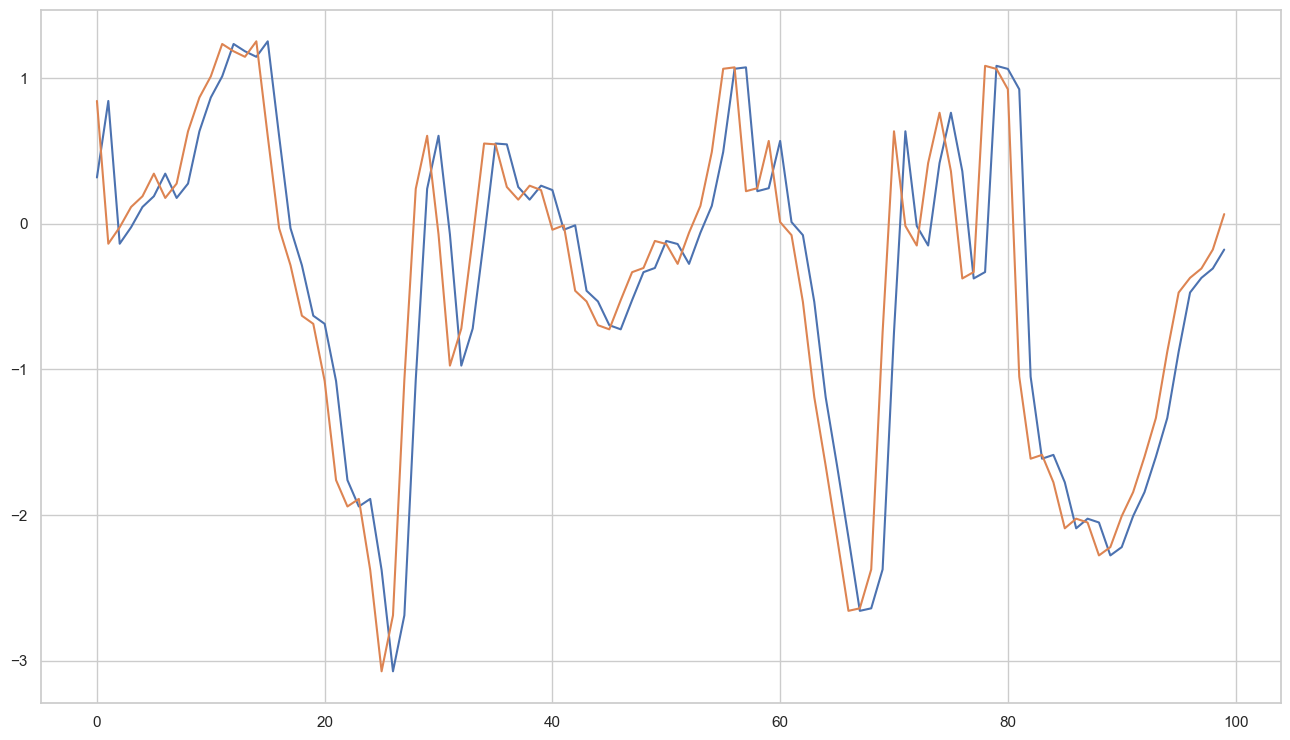

In [14]:
sensor_2 = sensor['rotationRate.x']
sensor_2_plus = sensor['rotationRate.x'][1:]
plt.plot(sensor_2.values[:100])
plt.plot(sensor_2_plus.values[:100]);

What are your conclusions from both visualizations?

In [15]:
# Your conclusions here:

# That there is an autocorrelation given that:
    # 1. In the lag plot, when the lag is close 1, the points are closer to the diagonal, indicating that
    # each point isn't at random.
    # 2. If we create a series lacking the initial values (we are creating a delayed series),
    # we can see how one is exactly a delayed version of the other, indicating autocorrelation.
    # 3. From both of them, the one that autocorrelates better is the rotationRate.x.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [16]:
# Your code here:

stationarity_userAcc = adfuller(sensor["userAcceleration.x"])
stationarity_userAcc[1] #p-value

2.823439483037483e-30

In [17]:
stationarity_rotaRate = adfuller(sensor["rotationRate.x"])
stationarity_rotaRate[1] #p-value

6.3202303359123905e-06

What are your conclusions from this test?

In [18]:
# Your conclusions here:

# 𝐻0  (Null Hypothesis) : The series is not stationary and there is a statistically significant trend
# 𝐻𝐴  (Alternative hypothesis) : The series is stationary 

# Given that in both cases p-value is < 0.05, we can reject H0.
# Therefore we have evidence to say that these variables are stationary.

## Bonus: Challenge 2

Finally, we'll create an ARIMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 0, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [19]:
from statsmodels.tsa.arima.model import ARIMA

In [20]:
order = (2, 0, 1)

In [21]:
# 0. Splitting into train & test
y_train = sensor["userAcceleration.x"][:-10]
y_test = sensor["userAcceleration.x"][-11:]

In [22]:
# 1. Create an instance of the ARIMA model that takes y_train, the order, and freq="S"
# Docs: https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html

model = ARIMA(y_train, order = order, freq="S")
model

In [23]:
# 2. Fit the model:

model = model.fit()

In [32]:
# 3. Predict: create y_pred:

y_pred = model.predict(start=len(y_train)+1, end=len(y_train)+11)

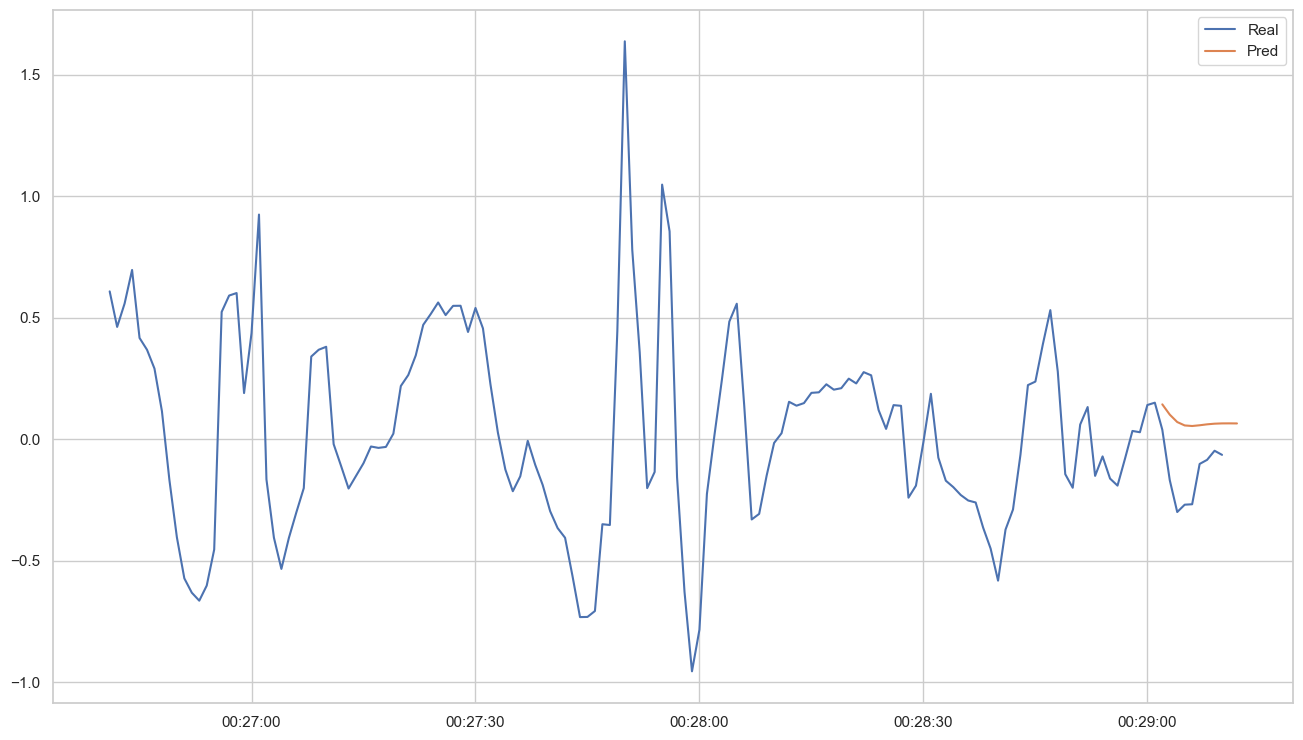

In [34]:
# 4. Visualize
plt.plot(sensor["userAcceleration.x"][-150:], label = "Real")
plt.plot(y_pred[-150:], label = "Pred")
plt.legend();

In [26]:
# Trying predict all points
y_pred_2 = model.predict(start=0, end=len(sensor["userAcceleration.x"]))

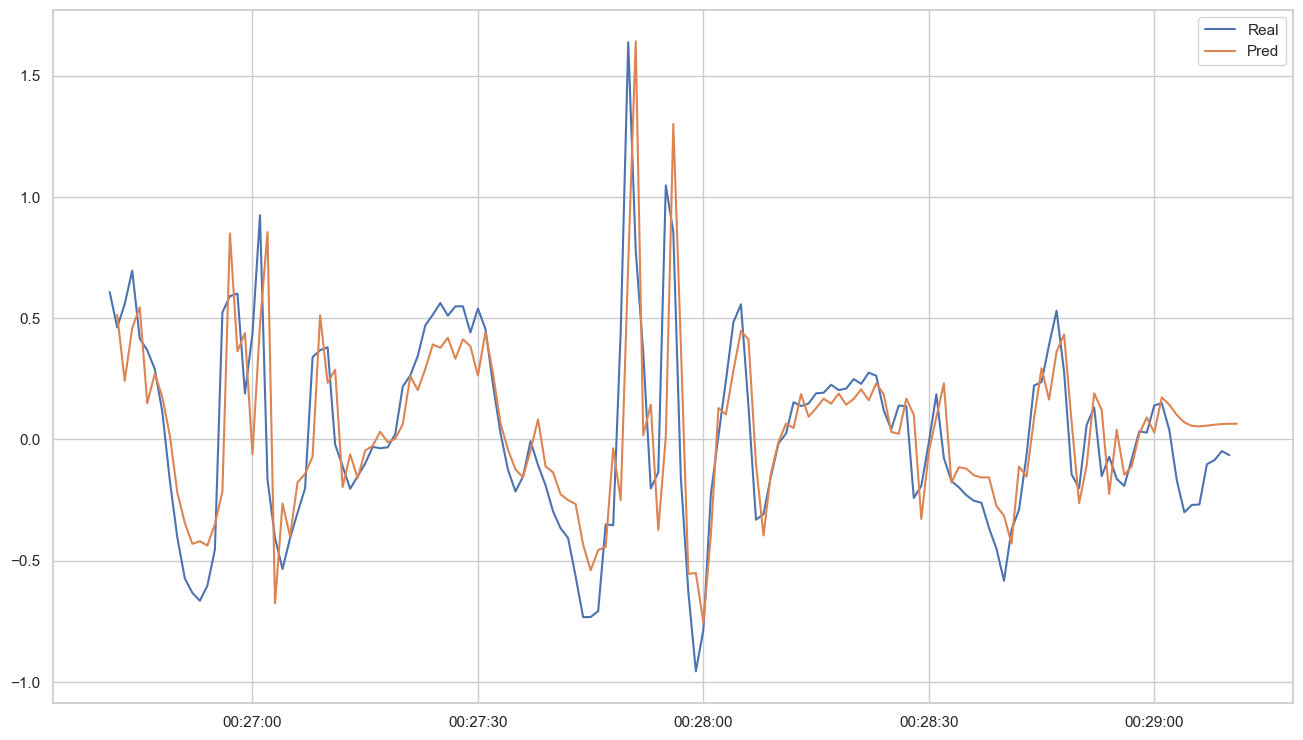

In [27]:
# 4. Visualize
plt.plot(sensor["userAcceleration.x"][-150:], label = "Real")
plt.plot(y_pred_2[-150:], label = "Pred")
plt.legend();

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [33]:
# Your code here:

rmse(y_pred, y_test)

0.20762086535744115